<a href="https://colab.research.google.com/github/silvestrerocha/timeseries/blob/main/SARIMA_TCC_USPESALQ_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analise de Série Temporal e Predição

Utilizando nesse modelo o software Python na nuvem "google.colab", para estudo da série temporal fornecida pelo cepea esalq para o desenvolvimento de modelo preditivo do indice da Soja no Porto de Paranaguá. Para responder as questões que segue:

01. Tenho uma base de dados confiável?

02. Como são os dados a serem estudados?

03. Tenho uma base de dados estatisticamente aceitável?

04. Consigo fazer uma analise de série temporal com essa base?

05. Apresenta sazonalidade?

06. Apresenta estacionariedade?

07. informe o periodo de treino e teste.

08. Modelo apresenta um bom desempenho?

09. Qual melhor modelo apresentado com o menor MAPE?

10. Comentários gerais..


Análise de Série Temporal e Previsão


**Importando as bibliotecas:**
1. Pycaret
2. Pandas

## **INSTALAÇÃO DE BIBLIOTECAS**

In [2]:
# Instalando pacotes: Pycaret e Pandas.
!pip install pycaret #pacote na versão slim do PyCaret
!pip install pycaret-ts-alpha #pacote do time series do pycaret
import pandas as pd
import matplotlib.pyplot as plt

  Using cached pycaret_ts_alpha-3.0.0.dev1649017462-py3-none-any.whl.metadata (13 kB)
  Using cached pandas-1.4.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
  Using cached scipy-1.7.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.2 kB)
  Using cached joblib-1.0.1-py3-none-any.whl.metadata (6.8 kB)
  Using cached numba-0.55.2-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (3.3 kB)
INFO: pip is looking at multiple versions of pycaret-ts-alpha to determine which version is compatible with other requirements. This could take a while.
  Using cached pycaret_ts_alpha-3.0.0.dev1648160839-py3-none-any.whl.metadata (10 kB)
  Using cached PyYAML-5.4.1.tar.gz (175 kB)
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is lik

## **IMPORTANDO DADOS**

In [3]:
# Importando para nuvem o arquivo para estudo
from google.colab import files # Importa o arquivo para a nuvem para leitura do google.colab
upload = files.upload()

Saving cepea_mar2024.xlsx to cepea_mar2024.xlsx


In [4]:
df = pd.read_excel('cepea_mar2024.xlsx') #criar um DataFrame
df.head() #verificar a estrutura

,Data,Reais,Dolar
0,03/2006,27.79,12.88
1,04/2006,27.02,12.70
2,05/2006,28.68,13.15
3,06/2006,29.41,13.10
4,07/2006,29.60,13.51


## **GRÁFICO DOS DADOS REAIS**

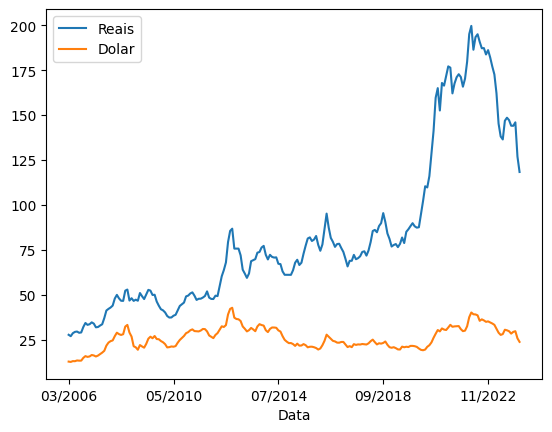

In [5]:
df.plot.line(x='Data', y=['Reais', 'Dolar']);

## **PREPARAÇÃO DOS DADOS**


In [6]:
# Adequação do DataFrame para estudar a variável 'Dolar'
# transforma-los em um DataFrame
df.Data = pd.to_datetime(df.Data) #coluna Data foi transformada em datetime
df.set_index('Data', drop=True, inplace=True) # Coluna Data foi transformada em indice da tabela
df.drop(columns=['Reais'], inplace=True) #remove a coluna 'Reais'
df.head()

<ipython-input-6-ba93a1f4b62b>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.Data = pd.to_datetime(df.Data) #coluna Data foi transformada em datetime


,Dolar
Data,
2006-03-01,12.88
2006-04-01,12.70
2006-05-01,13.15
2006-06-01,13.10
2006-07-01,13.51


## **INFORMAÇÕES DOS DADOS**

In [7]:
from matplotlib import pyplot as plt

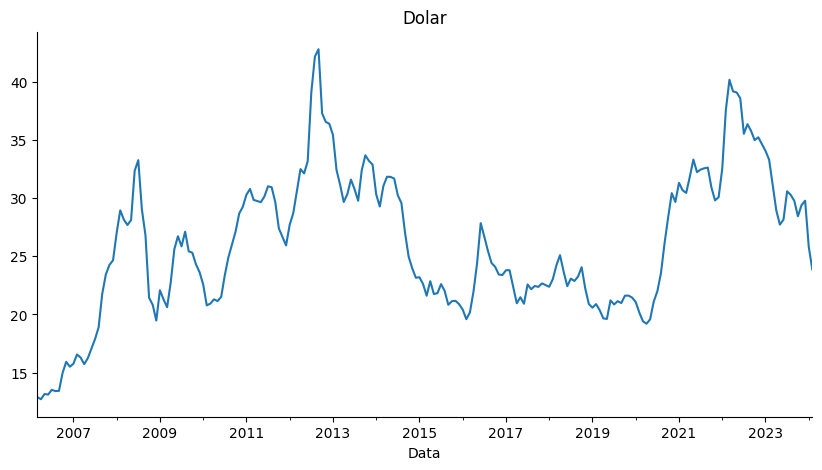

In [8]:
df['Dolar'].plot(kind='line', figsize=(10, 5), title='Dolar')
plt.gca().spines[['top', 'right']].set_visible(False)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 216 entries, 2006-03-01 to 2024-02-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Dolar   216 non-null    float64
dtypes: float64(1)
memory usage: 3.4 KB


## **GRÁFICO DOS DADOS**

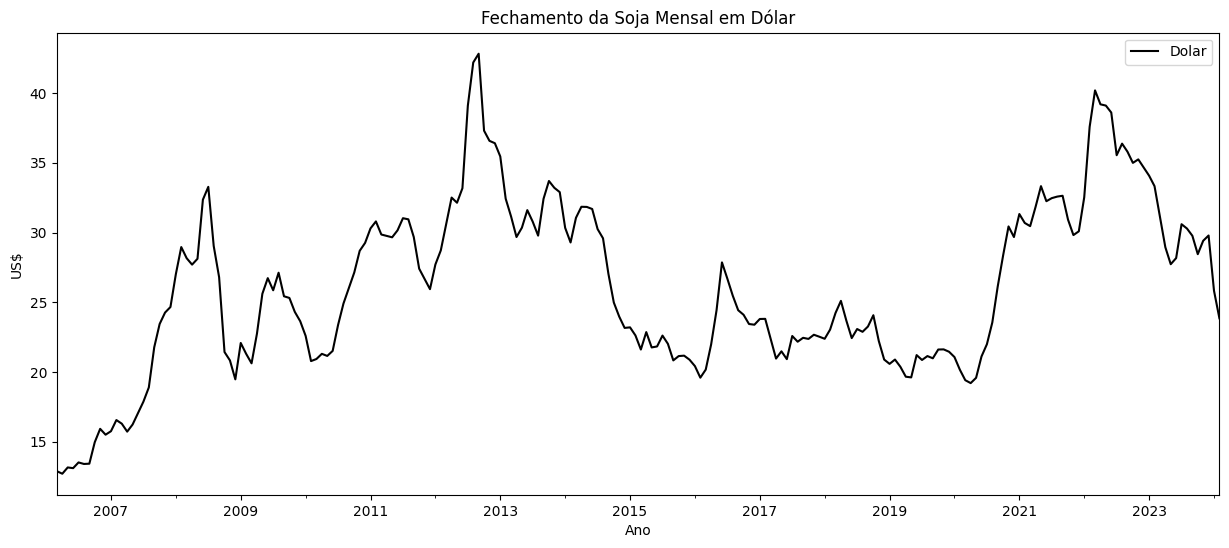

In [10]:
df.plot(figsize=(15,6), color='black');
plt.title("Fechamento da Soja Mensal em Dólar")
plt.ylabel('US$')
plt.xlabel("Ano")
plt.show()

In [11]:
#importando bibliotecas complementares do PyCaret
from pycaret.time_series import *

## **CONFIGURAÇÃO DA SÉRIE TEMPORAL**

In [12]:
# Inicialize o ambiente de treinamento
setup(df, fh=12, fold=10, seasonal_period='M')
#setup(data, fh='mensal prever 12 meses', fold=10, seasonal_period='M'-mensal)
# testar fold_strategy='expanding' - melhor resultado para periodos mensais, semestrais, anuais

,Description,Value
0,session_id,6285
1,Target,Dolar
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(216, 1)"
5,Transformed data shape,"(216, 1)"
6,Transformed train set shape,"(204, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


## **GRÁFICO SÉRIE TEMPORAL**

In [13]:
# analise dos dados
plot_model(plot='ts')

## **DESCRITIVO ESTATÍSTICO**

In [14]:
# Avaliação Estatística
#resultado = check_stats()# rodar para atualizar a tabela csv
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,216.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,26.013611
3,Summary,Statistics,Transformed,Median,,25.205
4,Summary,Statistics,Transformed,Standard Deviation,,6.106302
5,Summary,Statistics,Transformed,Variance,,37.286921
6,Summary,Statistics,Transformed,Kurtosis,,-0.26537
7,Summary,Statistics,Transformed,Skewness,,0.188744
8,Summary,Statistics,Transformed,# Distinct Values,,204.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",1355.081539


## **DECOMPOSIÇÃO DA SÉRIE TEMPORAL**

In [15]:
# Decomposição
plot_model(plot='decomp_stl')

## **TESTE DE ESTACIONARIEDADE "DIKCEY FULLER"**


*   15	Stationarity	ADF	Transformed	Stationarity	{'alpha': 0.05}	True
*   16	Stationarity	ADF	Transformed	p-value	{'alpha': 0.05}	0.019596
*   17	Stationarity	ADF	Transformed	Test Statistic	{'alpha': 0.05}	-3.206776
*   18	Stationarity	ADF	Transformed	Critical Value 1%	{'alpha': 0.05}	-3.461282
*   19	Stationarity	ADF	Transformed	Critical Value 5%	{'alpha': 0.05}	-2.875143
*   20	Stationarity	ADF	Transformed	Critical Value 10%	{'alpha': 0.05}	-2.57402
*   A SÉRIE É ESTACIONÁRIA

## **TREINO E TESTE**

In [16]:
# Plotar train e test
plot_model(plot = 'train_test_split')

In [17]:
# cross validation )confirmar com o professor.
plot_model(plot='cv')

## **AUTOCORRELAÇÃO "ACF" e "PACF"**

In [18]:
# Plotagem ACF - Autocorrelação
plot_model(plot='acf')

In [19]:
# Plotagem PACF - Autocorrelação Parcial
plot_model(plot='pacf')

In [20]:
# Plotagem do Diagnóstico
plot_model(plot='diagnostics')

## **TREINANDO MODELO**

In [21]:
# Utilizando Pycaret
best = compare_models()
#best_model = compare_models(n_select=3) # n_select seleciona os tres melhores modelos na variavel best_model

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
auto_arima,Auto ARIMA,0.4336,0.4209,2.2304,2.6537,0.0855,0.0904,-1.6367,2.4130
naive,Naive Forecaster,0.4600,0.4416,2.3591,2.7864,0.0891,0.0925,-1.7020,0.5450
theta,Theta Forecaster,0.5346,0.5170,2.7699,3.2856,0.1062,0.1059,-4.1853,0.0520
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,0.5722,0.5482,2.9828,3.5125,0.1175,0.1120,-5.5555,0.8200
exp_smooth,Exponential Smoothing,0.5979,0.5665,3.1158,3.6177,0.1194,0.1165,-5.7876,0.1180
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.6047,0.5743,3.1729,3.7011,0.1271,0.1193,-9.4533,0.5090
ets,ETS,0.6102,0.5785,3.1855,3.7006,0.1222,0.1186,-5.8632,0.1840
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,0.6158,0.6023,3.2329,3.8746,0.1293,0.1215,-9.2406,0.4260
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.6983,0.6634,3.6455,4.2514,0.1443,0.1334,-13.8432,1.0660
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.7081,0.6937,3.7019,4.4531,0.1471,0.1367,-8.2328,0.9070


Processing:   0%|          | 0/117 [00:00<?, ?it/s]

In [22]:
# Reservando o melhor resultado "auto_arima PyCaret"
auto_arima = create_model('auto_arima')  # criar modelo
print(auto_arima)
#Treinamento do Modelo ARIMA:
#Crie o modelo ARIMA usando a função create_model. Python
# Treine o modelo ARIMA
#auto_arima = create_model('auto_arima')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2013-02,0.2253,0.2149,1.3199,1.5034,0.0427,0.0421,-0.1117
1,2014-02,0.5991,0.5522,3.4121,3.7827,0.1324,0.1247,-0.0735
2,2015-02,0.1876,0.1849,1.0354,1.2418,0.0497,0.0480,-0.9917
3,2016-02,0.8937,0.7970,5.0010,5.3675,0.2020,0.2277,-6.8605
4,2017-02,0.3091,0.2741,1.6532,1.7753,0.0755,0.0723,-6.5306
5,2018-02,0.2418,0.2452,1.2274,1.5299,0.0558,0.0540,-0.2364
6,2019-02,0.1108,0.1184,0.5307,0.7102,0.0261,0.0256,-0.1100
7,2020-02,1.2254,1.2331,5.6170,7.1620,0.1977,0.2329,-1.3962
8,2021-02,0.4357,0.4658,1.9968,2.7141,0.0590,0.0622,-0.9373
9,2022-02,0.1073,0.1239,0.5102,0.7499,0.0140,0.0139,0.8810


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

AutoARIMA(random_state=6285, sp=12, suppress_warnings=True)


In [23]:
# Auto_arima tunado para melhorar o modelo (hiperparametrizado)
auto_arima_tuned = tune_model(auto_arima)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2013-02,0.2144,0.2285,1.2561,1.5988,0.0392,0.0401,-0.2572
1,2014-02,0.5991,0.5522,3.4121,3.7827,0.1324,0.1247,-0.0735
2,2015-02,0.1876,0.1849,1.0354,1.2418,0.0497,0.0480,-0.9917
3,2016-02,0.8937,0.7970,5.0010,5.3675,0.2020,0.2277,-6.8605
4,2017-02,0.3091,0.2741,1.6532,1.7753,0.0755,0.0723,-6.5306
5,2018-02,0.2418,0.2452,1.2274,1.5299,0.0558,0.0540,-0.2364
6,2019-02,0.1108,0.1184,0.5307,0.7102,0.0261,0.0256,-0.1100
7,2020-02,1.2254,1.2331,5.6170,7.1620,0.1977,0.2329,-1.3962
8,2021-02,0.4357,0.4658,1.9968,2.7141,0.0590,0.0622,-0.9373
9,2022-02,0.1073,0.1239,0.5102,0.7499,0.0140,0.0139,0.8810


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   59.7s finished


In [24]:
#blended (mesclado dos hiperparametrizado e o melhor modelo)
blender = blend_models([auto_arima, auto_arima_tuned])

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2013-02,0.2150,0.2067,1.2592,1.4460,0.0400,0.0402,-0.0284
1,2014-02,0.5991,0.5522,3.4121,3.7827,0.1324,0.1247,-0.0735
2,2015-02,0.1876,0.1849,1.0354,1.2418,0.0497,0.0480,-0.9917
3,2016-02,0.8937,0.7970,5.0010,5.3675,0.2020,0.2277,-6.8605
4,2017-02,0.3091,0.2741,1.6532,1.7753,0.0755,0.0723,-6.5306
5,2018-02,0.2418,0.2452,1.2274,1.5299,0.0558,0.0540,-0.2364
6,2019-02,0.1108,0.1184,0.5307,0.7102,0.0261,0.0256,-0.1100
7,2020-02,1.2254,1.2331,5.6170,7.1620,0.1977,0.2329,-1.3962
8,2021-02,0.4357,0.4658,1.9968,2.7141,0.0590,0.0622,-0.9373
9,2022-02,0.1073,0.1239,0.5102,0.7499,0.0140,0.0139,0.8810


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [25]:
plot_model(auto_arima)

In [26]:
plot_model(auto_arima_tuned)

In [27]:
plot_model(blender)

In [28]:
plot_model(auto_arima, plot='train_test_split')

## **Predição do Modelo**

In [29]:
#Faça Previsões com o Modelo Treinado:
#Use o modelo treinado para fazer previsões. Python

# Faça previsões (por exemplo, para os próximos 12 meses)
predictions = predict_model(auto_arima)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,Auto ARIMA,0.8890,0.7788,4.2383,4.6800,0.1539,0.1400,-4.4676


In [30]:
predictions = predict_model(auto_arima_tuned)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,Auto ARIMA,0.8890,0.7788,4.2383,4.6800,0.1539,0.1400,-4.4676


In [31]:
## Visualize as previsões
plot_model(auto_arima, plot='forecast')

In [32]:
plot_model(auto_arima, plot='residuals')

In [33]:
plot_model(auto_arima, plot='diagnostics')

In [34]:
#Modelo final
final_best = finalize_model(best)

In [35]:
# Gerando valores preditos
predict_model(final_best, fh=12) # predição de 12 meses

,y_pred
2024-03,23.5441
2024-04,23.8969
2024-05,24.0374
2024-06,24.0636
2024-07,24.1606
2024-08,24.0740
2024-09,24.1507
2024-10,24.3618
2024-11,24.2434
2024-12,24.2807


In [36]:
# gráfico do modelo final
plot_model(final_best, plot='forecast')

In [37]:
#prevendo para 24 meses
plot_model(final_best, data_kwargs={'fh':24})

In [38]:
#previsão na mesma série
plot_model(best, plot='insample')

In [39]:
# Salvando o modelo
save_model(final_best, 'AutoArima_Prediction_PyCaret')

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('model',
                                                                 ForecastingPipeline(steps=[('forecaster',
                                                                                             TransformedTargetForecaster(steps=[('model',
                                                                                                                                 AutoARIMA(random_state=6285,
                                                                                                                                           sp=12,
                                                                                                                                           suppress_warnings=True))]))]))]))]),
 'AutoArima_Prediction_PyCaret.pkl')

## **FINALIZANDO MODELO**

In [40]:
# Imprima os parâmetros do melhor modelo SARIMAX
print(best.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  204
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -352.663
Date:                Tue, 26 Nov 2024   AIC                            709.326
Time:                        01:22:10   BIC                            715.953
Sample:                    03-31-2006   HQIC                           712.007
                         - 02-28-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3740      0.064      5.862      0.000       0.249       0.499
sigma2         1.8887      0.119     15.904      0.000       1.656       2.121
Ljung-Box (L1) (Q):                   0.21   Jarque-

In [41]:
# Crie o melhor modelo SARIMAX
best_sarimax = finalize_model(auto_arima)

## **CONCLUSÃO DO ESTUDO**



Composição do estudo
*	Indice = CEPEA ESALQ
*	Fato  = Soja
*	Unidade de tempo = Mensal

Série Temporal Univariada = somente a cotação da soja em dólar
* 216 datas
* 01 coluna
* 204 meses train
* 12 test
* Detectado Sazonalidade
* Não Detectado Ruido
* Decomposição multiplicativo

Teste de Dikey Fuller a série é Estacionária

Série temporal com tendencia e sazonalidade – suavização exponencial de holt winters

* Ordem ARIMA: (2, 1, 0)
* Ordem Sazonal: (0, 0, 2, 12)
* Melhor Modelo SARIMAX: (2, 1, 0, 0, 0, 2, 12)

* Auto_Arima = MAPE - 0.0855       

* Auto_arima_Tuned = MAPE - 0.0852

* Blended = MAPE - 0.0852




modelo não apresenta bom desempenho preditivo por ter instabilidade nos dados, possível causa especial.